In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering


# Nedbør:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og "forfalsker" datafeil

In [2]:
# Oppretter filstien til JSONfil med nedbør
nedbor_fil = "../data/frost_nedbor.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_nedbor = DataRens()
manip_nedbor = DataManipulering()


# Lager DataFrame av en JSON
df = rens_nedbor.fra_json_til_dataframe(nedbor_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_nedbor.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_nedbor.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())


Fjern verdi for år 2010 (rad: 30)
Legger til duplikat for år 1986.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),766.8,mm,PT6H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),712.2,mm,PT6H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),840.5,mm,PT6H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),646.1,mm,PT6H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),871.4,mm,PT6H,C,1984


# Datarens av nedbør

Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 2010    NaN   mm
Manglende verdier er erstattet med gjennomsnittet:  831.86


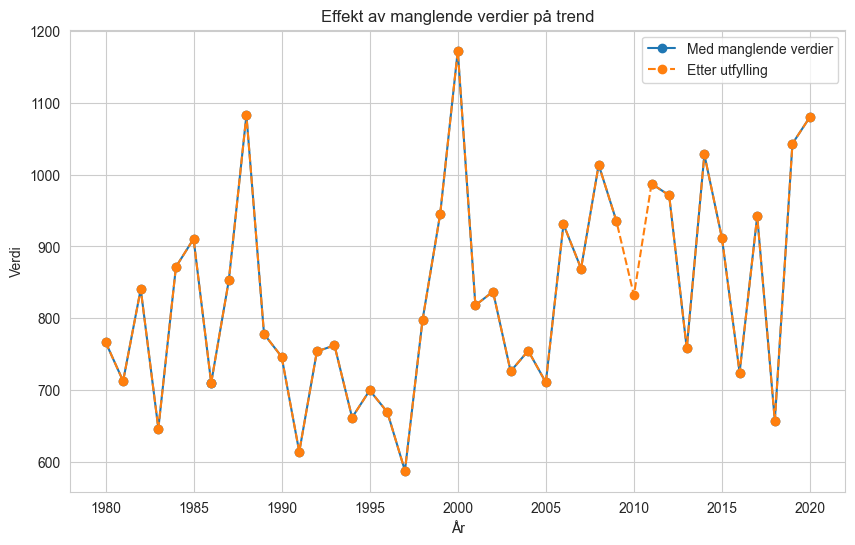

Ferdig renset dataframe (første fem radene):


,year,value,unit
0,1980,766.8,mm
1,1981,712.2,mm
2,1982,840.5,mm
3,1983,646.1,mm
4,1984,871.4,mm


In [15]:
# Lager en kopi av df - for visualisering 
df_urenset = df_legg_til_duplikater.copy()

# Renser df
df_nedbor_renset = rens_nedbor.rens_DataFrame(df_legg_til_duplikater, vis_manglende=False)

# Plotter begge
rens_nedbor.plot_manglende_data(df_urenset, df_nedbor_renset)

print('Ferdig renset dataframe (første fem radene):')
display(df_nedbor_renset.head())



# Beregninger av statistiske mål:
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [5]:
nedbor_mål = Statistiske_maal()

gjennomsnitt_nedbor = nedbor_mål.gjennomsnitt(df_nedbor_renset_gjennomsnittlige_verdier)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_nedbor.items():
    print(f"{key}: {value} mm")



Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 2.24 mm
1990-1999: 1.98 mm
2000-2009: 2.4 mm
2010-2020: 2.47 mm
Totalt: 2.28 mm


**Beregning av median**

In [6]:
median_nedbor = nedbor_mål.median(df_nedbor_renset_gjennomsnittlige_verdier)

print("Median i 4 intervaller + totalt: ")
for key, value in median_nedbor.items():
    print(f"{key}: {value} mm")

Median i 4 intervaller + totalt: 
1980-1989: 2.22 mm
1990-1999: 1.98 mm
2000-2009: 2.34 mm
2010-2020: 2.58 mm
Totalt: 2.24 mm


**Beregning av standardavvik**

In [7]:
standardavvik_nedbor = nedbor_mål.standardavvik(df_nedbor_renset_gjennomsnittlige_verdier)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_nedbor.items():
    print(f"{key}: {value} mm")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 0.34 mm
1990-1999: 0.28 mm
2000-2009: 0.39 mm
2010-2020: 0.38 mm
Totalt: 0.39 mm


# Visualiseringer:

In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from visualisering import vis_statistikk
from visualisering import visualiser_statistikk_per_tiår


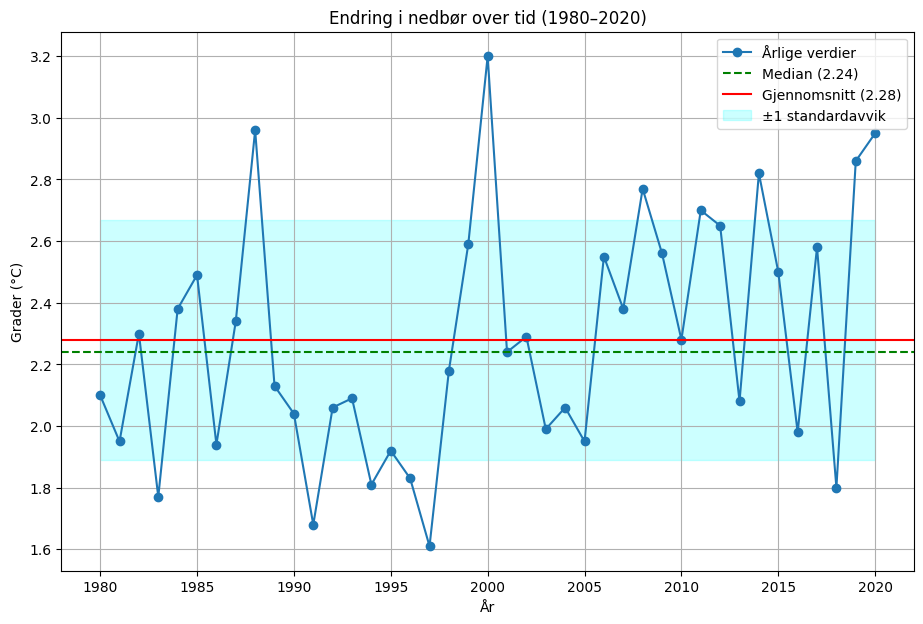

In [9]:
vis_statistikk(
    df_nedbor_renset_gjennomsnittlige_verdier["year"],
    df_nedbor_renset_gjennomsnittlige_verdier["value"],
    median=median_nedbor["Totalt"],
    gjennomsnitt=gjennomsnitt_nedbor["Totalt"],
    std=standardavvik_nedbor["Totalt"],
    tittel="Endring i nedbør over tid (1980–2020)",
    y_label="Grader (°C)"
)


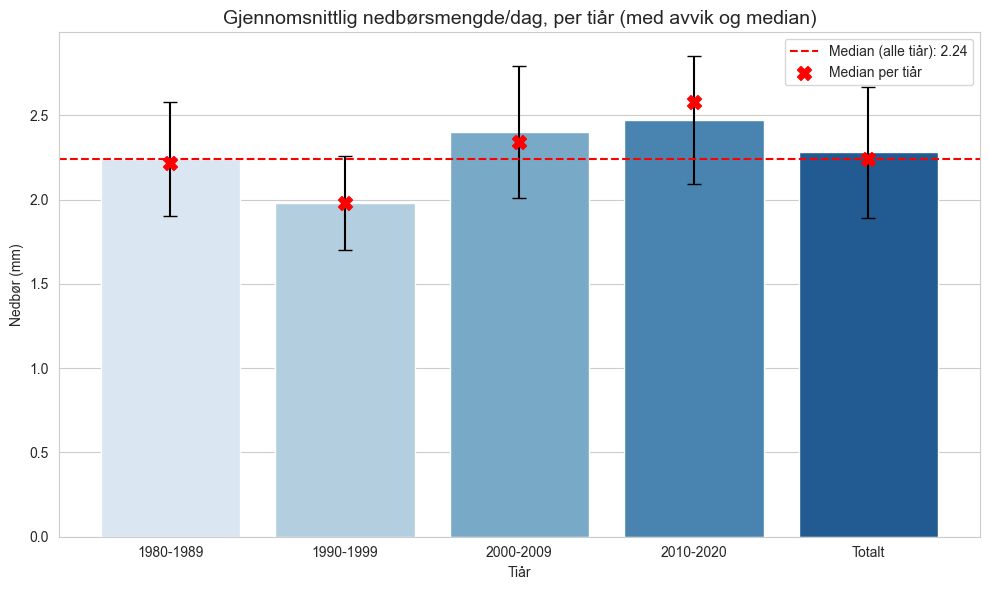

In [10]:
visualiser_statistikk_per_tiår(
    gjennomsnitt=gjennomsnitt_nedbor,
    median=median_nedbor,
    standardavvik=standardavvik_nedbor,
    tittel="Gjennomsnittlig nedbørsmengde/dag, per tiår (med avvik og median)",
    ylabel="Nedbør (mm)"
)


# Lagrer variablene til bruk i annen fil

In [11]:
%store gjennomsnitt_nedbor
%store median_nedbor
%store standardavvik_nedbor
%store df_nedbor_renset_gjennomsnittlige_verdier

Stored 'gjennomsnitt_nedbor' (dict)
Stored 'median_nedbor' (dict)
Stored 'standardavvik_nedbor' (dict)
Stored 'df_nedbor_renset_gjennomsnittlige_verdier' (DataFrame)


# Predektiv analyse av nedbør

In [12]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from prediktiv_analyse import TrendModel

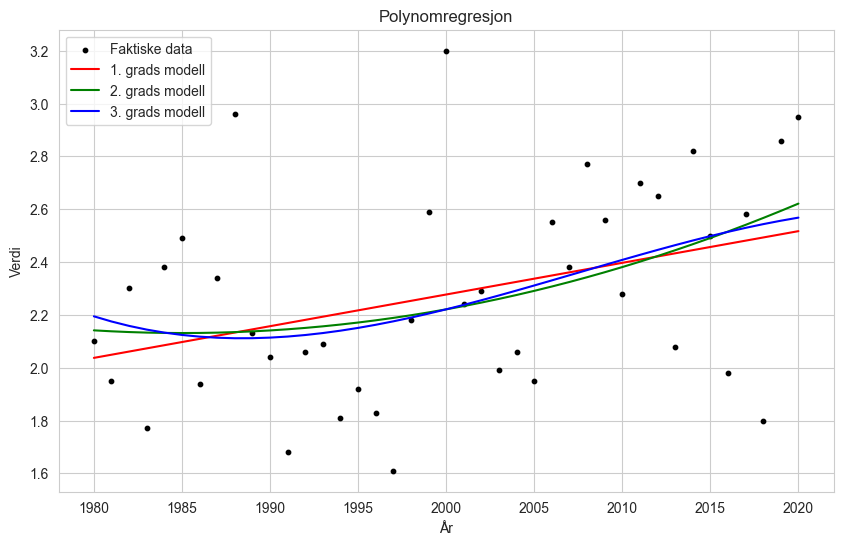

R²-scorer for modellene:
  1. grads modell: 0.1365
  2. grads modell: 0.1536
  3. grads modell: 0.1572


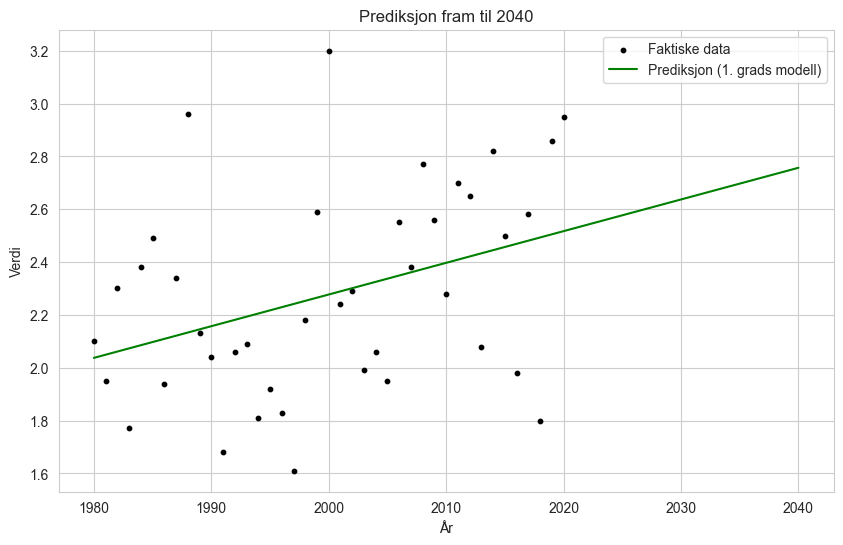

In [13]:
temp_model = TrendModel(df_nedbor_renset_gjennomsnittlige_verdier)
temp_model.fit_models()
temp_model.plot_models()
temp_model.print_r2_scores()
temp_model.plot_prediction(2040, deg=1)
